In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [1]:
### 使用 networkx 包中的函数 LFR_benchmark_graph 生成随机图
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

n = 3000
tau1 = 2  # Power-law exponent for the degree distribution
tau2 = 1.1 # Power-law exponent for the community size distribution 
            #S hould be >1
mu = 0.5 # Mixing parameter
avg_deg = 25 # Average Degree
max_deg = int(n/10) # Max Degree
min_commu = 60 #int(0.02*n) # Min Community Size
max_commu = int(n/10) # Max Community Size


G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=avg_deg, max_degree=max_deg, min_community=min_commu, max_community=max_commu, 
    seed=2
)

# nx.draw(G, pos=nx.spring_layout(G),node_color='r', node_size=3, edge_color='b')  # Draw the graph generated above

In [2]:
### 使用 networkx 包中的函数 LFR_benchmark_graph 生成随机图
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

for n in range(1000,10000,1000):
    tau1 = 2  # Power-law exponent for the degree distribution
    tau2 = 1.1 # Power-law exponent for the community size distribution 
                #S hould be >1
    mu = 0.5 # Mixing parameter
    avg_deg = 25 # Average Degree
    max_deg = int(n/10) # Max Degree
    min_commu = 60 #int(0.02*n) # Min Community Size
    max_commu = int(n/10) # Max Community Size

    G = LFR_benchmark_graph(
        n, tau1, tau2, mu, average_degree=avg_deg, max_degree=max_deg, min_community=min_commu, max_community=max_commu, 
        seed=2
    )

In [1]:
### 使用 networkx 包中的函数 LFR_benchmark_graph 生成随机图
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

n = 3000
tau1 = 2  # Power-law exponent for the degree distribution
tau2 = 1.1 # Power-law exponent for the community size distribution 
            #S hould be >1
mu = 0.01 # Mixing parameter
avg_deg = 42 # Average Degree
max_deg = int(n/10) # Max Degree
min_commu = 208 # Min Community Size
max_commu = int(n/10) # Max Community Size


G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=avg_deg, max_degree=max_deg, min_community=min_commu, max_community=max_commu, 
    seed=2
)

10000 50 240

9000 48 220

8000 46 210

7000 46 215

6000 46 210

5000 42 208

4000 42 208

3000 42 208

2000 36 160

1000 25 80

In [2]:
### 去掉 G 中的重边和自环 
G = nx.Graph(G) # Remove multi-edges

selfloop_edges = list(nx.selfloop_edges(G)) # a list of self loops

G.remove_edges_from(selfloop_edges) # Remove self-loops

In [3]:
### LFR 图是有内在的社群结构的，每个节点的社群存储在其 community 属性中，是一个 set
# 通过运行循环，按照内在的社群结构给每个节点一个标签 即为其 intrinsic_membership
# 为了方便 intrinsic_membership 一开始是作为一个 dict 存储的
intrinsic_communities = {frozenset(G.nodes[v]["community"]) for v in G}
intrinsic_membership = {}
for node in range(G.number_of_nodes()):
    for index, inner_set in enumerate(intrinsic_communities):
        if node in inner_set:
            intrinsic_membership[node] = index
            break
# intrinsic_membership = list(intrinsic_membership.values())

# 存储 list 和 clustering 格式的拷贝 省得以后需要再做类型转换了
intrinsic_list = list(intrinsic_membership.values())
from clusim.clustering import Clustering
intrinsic_clustering = Clustering(elm2clu_dict={i: [intrinsic_membership[i]] for i in intrinsic_membership.keys()})

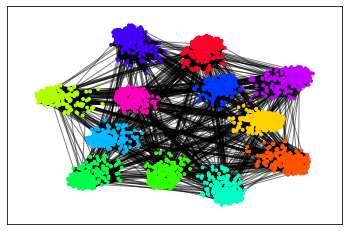

In [4]:
import matplotlib
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,
                      pos,
                      node_size=8,
                      cmap=matplotlib.colormaps.get_cmap('gist_rainbow'),
                      node_color=intrinsic_list
                      )
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [5]:
### 导入 图嵌入评估函数 我自己封装的
from auxpack.evaluate_embd import evaluate_embd as EE

dim_rg = [16,32,64,128,256,512];

In [6]:
%%time
### 3 MNMF 方法

from karateclub import MNMF

K = max(intrinsic_list)+1

for D in dim_rg:
    # Create an instance of the MNMF model
    MNMF_model = MNMF(dimensions = D, clusters = K, lambd = 0.2, 
                 alpha = 0.05, beta = 0.05, iterations = 100, 
                 lower_control = 1e-15, eta = 5.0, seed = 42)

    # Fit the model to the graph
    MNMF_model.fit(G)

    # Obtain the graph embeddings
    MNMF_embd = MNMF_model.get_embedding()

    print(f"{D}-dim:", EE(intrinsic_list, intrinsic_clustering, MNMF_embd))

/N/u/zfwei/BigRed200/.local/lib/python3.10/site-packages/karateclub/community_detection/overlapping/mnmf.py:82: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self._B1 = nx.adjacency_matrix(


16-dim: [0.9885230162270923, 0.9858965480401729, 0.9853568973752872, 0.9815624280640739]


/N/u/zfwei/BigRed200/.local/lib/python3.10/site-packages/karateclub/community_detection/overlapping/mnmf.py:82: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self._B1 = nx.adjacency_matrix(


32-dim: [0.9766680391308425, 0.9695526526696479, 0.9689091896184793, 0.9567319327537771]


/N/u/zfwei/BigRed200/.local/lib/python3.10/site-packages/karateclub/community_detection/overlapping/mnmf.py:82: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self._B1 = nx.adjacency_matrix(


64-dim: [0.9991371949975819, 1.0000000000000002, 0.9990043501048218, 1.0]


/N/u/zfwei/BigRed200/.local/lib/python3.10/site-packages/karateclub/community_detection/overlapping/mnmf.py:82: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self._B1 = nx.adjacency_matrix(


128-dim: [0.9982570598220857, 0.995776091824299, 0.9980081198968587, 0.9950460711154189]


/N/u/zfwei/BigRed200/.local/lib/python3.10/site-packages/karateclub/community_detection/overlapping/mnmf.py:82: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self._B1 = nx.adjacency_matrix(


256-dim: [0.9936619194442088, 1.0, 0.9902665037375467, 1.0]


/N/u/zfwei/BigRed200/.local/lib/python3.10/site-packages/karateclub/community_detection/overlapping/mnmf.py:82: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self._B1 = nx.adjacency_matrix(


512-dim: [0.9635305809697, 0.9973920029045371, 0.926856026251081, 0.9970149338438958]
CPU times: user 17min 34s, sys: 32min 36s, total: 50min 10s
Wall time: 9min 30s


In [12]:
%%time
### 1 HOPE 方法
from gem.embedding.hope import HOPE
for D in dim_rg:
    hope_model = HOPE(d=D, beta=0.01) 
    # A higher value of beta places more emphasis on capturing higher-order proximities
    hope_embd = hope_model.learn_embedding(graph=G, is_weighted=False, no_python=True)
    print(f"{D}-dim:", EE(intrinsic_list, intrinsic_clustering, hope_embd))

5-dim: [0.3823077134330061, 0.6022922813150142, 0.13967291058069095, 0.45437297455535347]
7-dim: [0.5072817673795619, 0.7928627872940801, 0.20581411475451591, 0.669149659851406]
9-dim: [0.6098394595760249, 0.8431553342398491, 0.2859462319280153, 0.8051574363468308]
11-dim: [0.7027063180672598, 0.8646879538347192, 0.387273527383692, 0.768417217044364]
13-dim: [0.78840859369483, 0.9174556330435574, 0.5218622510915577, 0.8961658739864657]
15-dim: [0.8487333784932901, 0.9350278410932144, 0.627261031839733, 0.9120981085375212]
17-dim: [0.9036956585347923, 0.9276713632409905, 0.742959885028705, 0.9048322151143287]
19-dim: [0.953070781361253, 0.9569375419433596, 0.8713385990338163, 0.9406543163429262]
21-dim: [0.9873611536868581, 0.981343789897072, 0.9825943554538521, 0.9742650490299626]
23-dim: [1.0, 1.0, 1.0, 1.0]
25-dim: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
27-dim: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
29-dim: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
31

In [11]:
%%time
### 2 Laplacian 方法
from gem.embedding.lap import LaplacianEigenmaps
for D in dim_rg:
    lap_model = LaplacianEigenmaps(d=D)
    lap_embd = lap_model.learn_embedding(graph=G, is_weighted=False, no_python=True)
    print(f"{D}-dim:", EE(intrinsic_list, intrinsic_clustering, lap_embd))

5-dim: [0.9232402159872183, 0.9933037286647749, 0.7216431244300494, 0.9884403535353535]
7-dim: [0.9402833103043438, 1.0, 0.8137547829994863, 1.0]
9-dim: [0.9756005949969183, 1.0, 0.9117132867132868, 1.0]
11-dim: [1.0, 1.0, 1.0, 1.0]
13-dim: [1.0, 1.0, 1.0, 1.0]
15-dim: [1.0, 1.0, 1.0, 1.0]
17-dim: [1.0, 1.0, 1.0, 1.0]
19-dim: [1.0, 1.0, 1.0, 1.0]
21-dim: [1.0, 1.0, 1.0, 1.0]
23-dim: [0.9867918488169867, 0.9677916092229673, 0.9674250450450451, 0.8930436652236653]
25-dim: [0.9879368966035568, 0.9659898482827701, 0.9690101369863015, 0.8924103521193241]
27-dim: [0.9717168126003642, 0.9679085816406431, 0.9298000000000001, 0.894235182008767]
29-dim: [0.964529504616945, 0.9652861233988528, 0.8993826147114918, 0.8886931804021524]
31-dim: [0.9660333179324478, 0.9652069787767348, 0.8914184615384615, 0.8880772249290539]
33-dim: [0.9550977786464921, 0.9474788715758008, 0.8611490416990416, 0.8568057142857143]
35-dim: [0.9519590249836472, 0.9671090063549961, 0.8675298757349822, 0.8899927577663427]
3

In [13]:
%%time
### 4 Node2Vec 方法 

from node2vec import Node2Vec

for D in dim_rg:
    # Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
    node2vec_model = Node2Vec(G, dimensions=D, walk_length=16, num_walks=8, workers=32, quiet=True) #, temp_folder='test' # Use temp_folder for big graphs
    # Embed nodes 
    node2vec_fit = node2vec_model.fit(window=10, min_count=1, batch_words=16192)  
    # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed 
    # (from the Node2Vec constructor)
    node2vec_embd = []
    for i in range(G.number_of_nodes()):
        node2vec_embd.append(node2vec_fit.wv[str(i)])
    print(f"{D}-dim:", EE(intrinsic_list, intrinsic_clustering, node2vec_embd))

5-dim: [0.9940523389802913, 1.0, 0.9911876605970351, 1.0]
7-dim: [1.0, 1.0, 1.0, 1.0]
9-dim: [1.0, 1.0, 1.0, 1.0]
11-dim: [1.0, 1.0, 1.0, 1.0]
13-dim: [1.0, 1.0, 1.0, 1.0]
15-dim: [1.0, 1.0, 1.0, 1.0]
17-dim: [1.0, 1.0, 1.0, 1.0]
19-dim: [1.0, 1.0, 1.0, 1.0]
21-dim: [1.0, 1.0, 1.0, 1.0]
23-dim: [1.0, 1.0, 1.0, 1.0]
25-dim: [1.0, 1.0, 1.0, 1.0]
27-dim: [1.0, 1.0, 1.0, 1.0]
29-dim: [1.0, 1.0, 1.0, 1.0]
31-dim: [1.0, 1.0, 1.0, 1.0]
33-dim: [1.0, 1.0, 1.0, 1.0]
35-dim: [1.0, 1.0, 1.0, 1.0]
37-dim: [1.0, 1.0, 1.0, 1.0]
39-dim: [1.0, 1.0, 1.0, 1.0]
41-dim: [1.0, 1.0, 1.0, 1.0]
43-dim: [1.0, 1.0, 1.0, 1.0]
CPU times: user 29min 53s, sys: 18min 5s, total: 47min 58s
Wall time: 5min 51s


In [14]:
%%time
### 5 DeepWalk方法
from karateclub import DeepWalk
for D in dim_rg:
    model = DeepWalk(dimensions=D, walk_length=16, window_size=10)
    model.fit(G)
    deepwalk_embd = model.get_embedding()
    print(f"{D}-dim:", EE(intrinsic_list, intrinsic_clustering, deepwalk_embd))

5-dim: [0.9693568065179067, 0.9867949439489553, 0.8966148594857097, 0.9785968264113426]
7-dim: [1.0, 1.0, 1.0, 1.0]
9-dim: [1.0, 1.0, 1.0, 1.0]
11-dim: [1.0, 1.0, 1.0, 1.0]
13-dim: [1.0, 1.0, 1.0, 1.0]
15-dim: [1.0, 1.0, 1.0, 1.0]
17-dim: [1.0, 1.0, 1.0, 1.0]
19-dim: [1.0, 1.0, 1.0, 1.0]
21-dim: [1.0, 1.0, 1.0, 1.0]
23-dim: [1.0, 1.0, 1.0, 1.0]
25-dim: [1.0, 1.0, 1.0, 1.0]
27-dim: [1.0, 1.0, 1.0, 1.0]
29-dim: [1.0, 1.0, 1.0, 1.0]
31-dim: [1.0, 1.0, 1.0, 1.0]
33-dim: [1.0, 1.0, 1.0, 1.0]
35-dim: [1.0, 1.0, 1.0, 1.0]
37-dim: [1.0, 1.0, 1.0, 1.0]
39-dim: [1.0, 1.0, 1.0, 1.0]
41-dim: [1.0, 1.0, 1.0, 1.0]
43-dim: [1.0, 1.0, 1.0, 1.0]
CPU times: user 24min 38s, sys: 18min 10s, total: 42min 49s
Wall time: 33.2 s


In [15]:
%%time
### 6 LINE 方法
from ge import LINE
for D in dim_rg:
    model = LINE(G,embedding_size=D,order='first');
    model.train(batch_size=8192,epochs=50,verbose=0);# train model
    LINE_embd = model.get_embeddings();# get embedding vectors

    LINE_embd = list(LINE_embd.values())

    print(f"{D}-dim:", EE(intrinsic_list, intrinsic_clustering, LINE_embd))

2023-06-30 12:00:51.133118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 12:00:52.254691: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38271 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:02:00.0, compute capability: 8.0
2023-06-30 12:00:52.257477: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38271 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0


5-dim: [0.9458577306422126, 0.9671897457348126, 0.8968378033189974, 0.9501959434164687]
7-dim: [1.0, 1.0, 1.0, 1.0]
9-dim: [1.0, 1.0, 1.0, 1.0]
11-dim: [1.0, 1.0, 1.0, 1.0]
13-dim: [1.0, 1.0, 1.0, 1.0]
15-dim: [1.0, 1.0, 1.0, 1.0]
17-dim: [1.0, 1.0, 1.0, 1.0]
19-dim: [1.0, 1.0, 1.0, 1.0]
21-dim: [1.0, 1.0, 1.0, 1.0]
23-dim: [1.0, 1.0, 1.0, 1.0]
25-dim: [1.0, 1.0, 1.0, 1.0]
27-dim: [1.0, 1.0, 1.0, 1.0]
29-dim: [1.0, 1.0, 1.0, 1.0]
31-dim: [1.0, 1.0, 1.0, 1.0]
33-dim: [1.0, 1.0, 1.0, 1.0]
35-dim: [1.0, 1.0, 1.0, 1.0]
37-dim: [1.0, 1.0, 1.0, 1.0]
39-dim: [1.0, 1.0, 1.0, 1.0]
41-dim: [1.0, 1.0, 1.0, 1.0]
43-dim: [1.0, 1.0, 1.0, 1.0]
CPU times: user 26min 33s, sys: 18min 21s, total: 44min 54s
Wall time: 2min 20s


In [16]:
%%time
### 7 LLE 方法
from auxpack.lle import lle
for D in dim_rg:
    lle_embd = lle(G, D)
    print(f"{D}-dim:", EE(intrinsic_list, intrinsic_clustering, lle_embd))

5-dim: [0.9980869735715006, 0.9846794907873947, 0.9970548821548821, 0.9702276740624803]
7-dim: [1.0, 1.0, 1.0, 1.0]
9-dim: [1.0, 1.0, 1.0, 1.0]
11-dim: [1.0, 1.0, 1.0, 1.0]
13-dim: [1.0, 1.0, 1.0, 1.0]
15-dim: [1.0, 1.0, 1.0, 1.0]
17-dim: [1.0, 1.0, 1.0, 1.0]
19-dim: [0.9849998602217618, 1.0, 0.9614945054945054, 1.0]
21-dim: [0.9873602430448768, 1.0, 0.9681355555555556, 1.0]
23-dim: [0.9830730309938028, 0.973623965342027, 0.9545888594164457, 0.9013428401663696]
25-dim: [0.9766687786152578, 0.9678444937021975, 0.9149016541353383, 0.8933264935064935]
27-dim: [0.9792382797034671, 1.0, 0.9226588679245283, 1.0]
29-dim: [0.9760897847673613, 1.0, 0.9451580312907432, 1.0]
31-dim: [0.9552149076886731, 1.0, 0.8653880106100796, 1.0]
33-dim: [0.9420002304669386, 0.9797848825623091, 0.8472067645374052, 0.9246596078431374]
35-dim: [0.9699687762389023, 0.9732898540453203, 0.8894000000000001, 0.8995650623885919]
37-dim: [0.9873602430448768, 0.9954284452481378, 0.9681355555555556, 0.9914363636363637]
3